In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/naure/OneDrive/Desktop/codsoft/Churn_Modelling.csv") 

In [3]:
print("\n🧹 Checking for missing values...")
print(df.isnull().sum())


🧹 Checking for missing values...
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


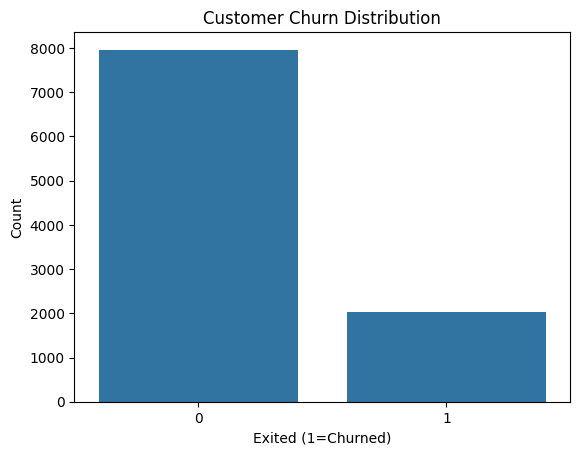

In [4]:
sns.countplot(data=df, x='Exited')
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (1=Churned)")
plt.ylabel("Count")
plt.show()

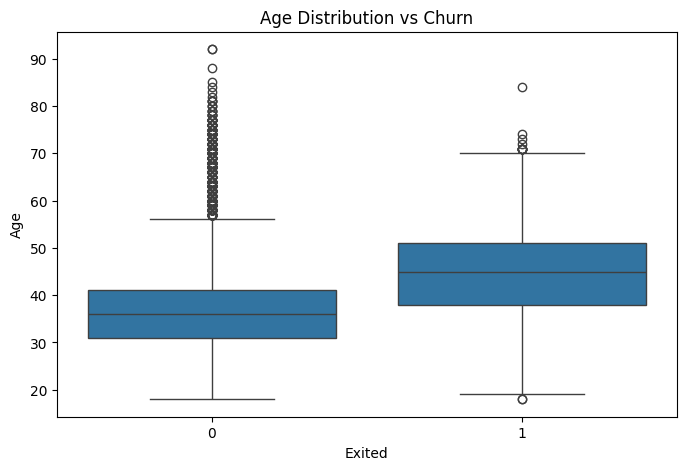

In [5]:
# Boxplot of age vs churn
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age Distribution vs Churn")
plt.show()


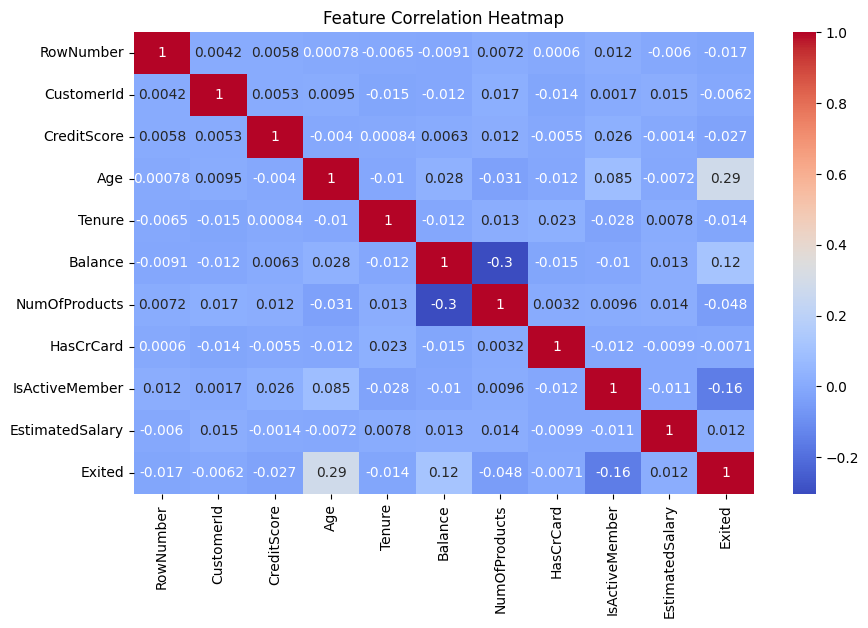

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Drop irrelevant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
# Encode categorical features
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [9]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

best_model = None
best_accuracy = 0
best_auc = 0


🔍 Training: Logistic Regression
✅ Accuracy: 0.8080
✅ ROC AUC: 0.7748
📊 Confusion Matrix:
[[1540   53]
 [ 331   76]]
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



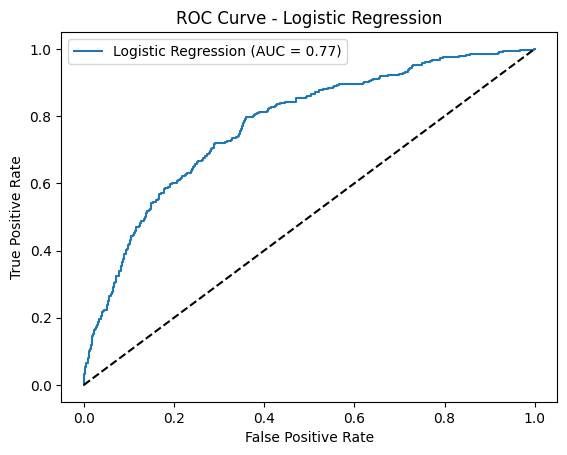


🔍 Training: Random Forest
✅ Accuracy: 0.8615
✅ ROC AUC: 0.8543
📊 Confusion Matrix:
[[1538   55]
 [ 222  185]]
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



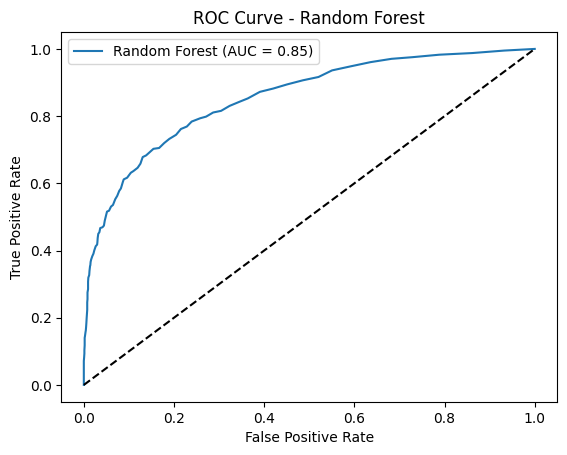


🔍 Training: Gradient Boosting
✅ Accuracy: 0.8700
✅ ROC AUC: 0.8708
📊 Confusion Matrix:
[[1541   52]
 [ 208  199]]
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1593
           1       0.79      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.84      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



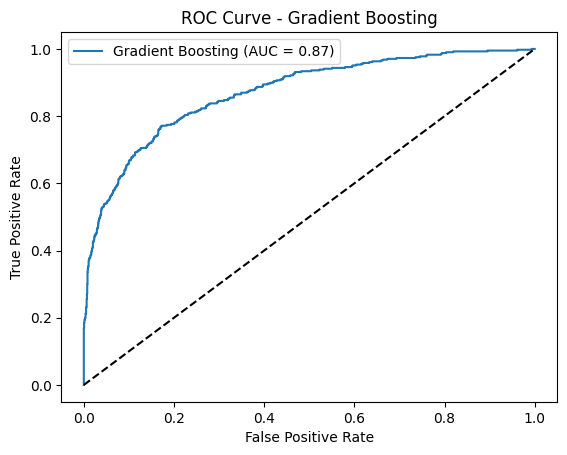

In [12]:
for name, model in models.items():
    print(f"\n🔍 Training: {name}")
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    
    print(f"✅ Accuracy: {acc:.4f}")
    print(f"✅ ROC AUC: {auc:.4f}")
    print("📊 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend()
    plt.show()
    
    # Track best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_auc = auc
        best_model = name


In [13]:
print(f"\n🏆 Best Model: {best_model}")
print(f"🔝 Best Accuracy: {best_accuracy:.4f}")
print(f"🔝 Best ROC AUC: {best_auc:.4f}")


🏆 Best Model: Gradient Boosting
🔝 Best Accuracy: 0.8700
🔝 Best ROC AUC: 0.8708


📊 Confusion Matrix:
[[1541   52]
 [ 208  199]]


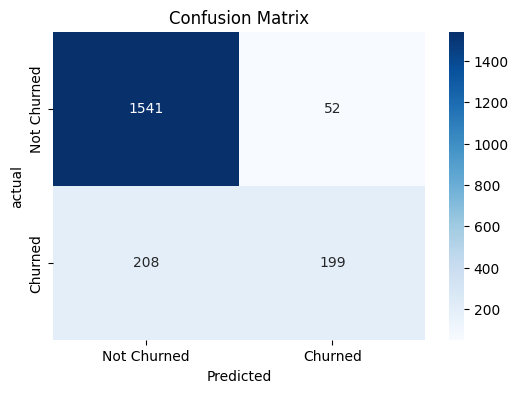

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("📊 Confusion Matrix:")
print(cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()